In [ ]:
email = input("What´s your email? ").strip()

if "@" in email:
  print("Valid")
else:
  print("Invalid")

What´s your email? a@
Valid


- improving my email check
- looking for @ and a "."

In [ ]:
email = input("What´s your email? ").strip()

if "@" in email and "." in email:
  print("Valid")
else:
  print("Invalid")

- further improvement: splitting into username, domain name

In [ ]:
email = input("What´s your email? ").strip()

username, domain = email.split("@")

if username and "." in domain:
  print("Valid")
else:
  print("Invalid")

What´s your email? jo@ahoj
Invalid


- further improvement: I want to check if the domain ends with .edu

In [ ]:
email = input("What´s your email? ").strip()

username, domain = email.split("@")

if username and domain.endswith(".edu"):
  print("Valid")
else:
  print("Invalid")

- catching all possible problems would fast become overwhelming
- there´s a library __re__ that can help us

In [ ]:
#re.search(pattern,string,flags=0)
import re

email = input("What´s your email? ").strip()

if re.search("@", email):
  print("Valid")
else:
  print("Invalid")


What´s your email? ah@ho
Valid


We can use these:
- "." any character except a newline
- "*" 0 or more repetitions
- "+" 1 or more repetitions
- "?" 0 or more repetition
- {m} m repetitions
- {m,n} m-n repetitions

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(".*@.*", email):
  print("Valid")
else:
  print("Invalid")


How is the computer going to track if the email matches the pattern?
- it´s going to use something called finite state machine
  - nondeterministic finite automaton
- the function starts in the left
- then it´s going to read the user´s email address from left to right
- it´s going to decide whether to stay in this first state or to transition to the next state
- for instance for email malan@harvard.edu:
  - username:
    - m (the arrow with the dot)
    - a (the arrow with the dot)
    - l (the arrow with the dot)
    - a (the arrow with the dot)
    - n (the arrow with the dot)
  - @ transition into the another state
  - after this it´s going to read the rest of the address
    - h (the arrow with the dot)
    - a (the arrow with the dot)
    - r (the arrow with the dot)
    - v (the arrow with the dot)
    - a (the arrow with the dot)
    - r (the arrow with the dot)
    - d (the arrow with the dot)
    - . (the arrow with the dot)
    - e (the arrow with the dot)
    - d (the arrow with the dot)
    - u (the arrow with the dot)
  - then the computer is going to check did it end up in a final state?
    - it´s the state with the double circles
    - if computer finds itself in the final state, it´s a valid email
    - if computer gets "stuck" in the non-final state, it´s invalid email address


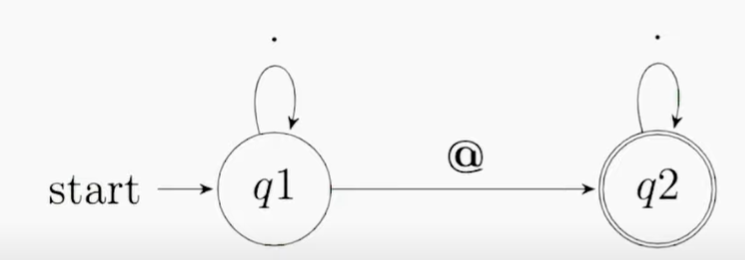

That´s not a valid solution. If I do better differently with:

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(".+@.+", email): #if there´s any character except a new line one or more lines (equivalent: .+ = ..*)
  print("Valid")
else:
  print("Invalid")


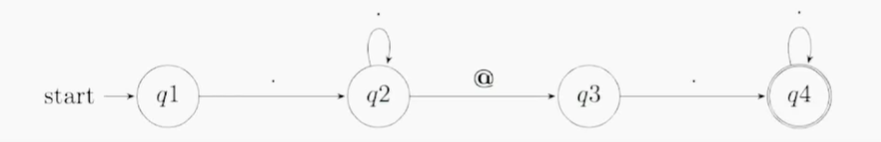

We improve the code further
- we will check if the string ends with ".edu"

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r".+@.+\.edu", email): # I need to use an escape character .. and if I´m using backslash in regular expression, I need to use raw string: don´t interpret backslah
  print("Valid")
else:
  print("Invalid")


What´s your email? malan@harvardedu
Invalid


Unfortunately, this is still not enough
- if I type in a sentence e.g. My name is ondrej@gmail.com., it will pass
- let´s use more symbols

__New symbols__:
- "^" matches the start of the string
- "$" matches the end of the string just before the newline at the end of the string

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^.+@.+\.edu$", email): # I need to use an escape character .. and if I´m using backslash in regular expression, I need to use raw string: don´t interpret backslah
  print("Valid")
else:
  print("Invalid")


What´s your email? ondrej@asd.edu
Valid


- the above code is still not good enough
- I could pass something like ondrej@@@gmail.edu and it´d pass
- I need new symbols

__New symbols:__
- [] set of characters
- [^] complementing the set
- so instead of using "." I can specify allowed (or not allowed) characters

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^[abcde]+@[abcde]+\.edu$", email): # specifying allowed symbols - the whole alphabet (not optimal for sure)
  print("Valid")
else:
  print("Invalid")


KeyboardInterrupt: Interrupted by user

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^[^@]+@[^@]+\.edu$", email): # specifying forbidden characters
  print("Valid")
else:
  print("Invalid")


We´re still doing a bad job ..
- the user can start the email with all kind of special symbols
- I need to specify what symbols is he allowed to use
- I´d like him to allow letter, numbers, underscore

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^[a-zA-Z0-9_]+@[a-zA-Z0-9_]+\.edu$", email):
  print("Valid")
else:
  print("Invalid")


What´s your email? ondrejsmolik@harvard.edu
Valid


Some patterns are often pre-set
- \w word character as well as numbers and the underscore
- \W not a word character
- \D not a decimal digit
- \s whitespace characters
- \S not a whitespace characters

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^\w+@\w+\.edu$", email):
  print("Valid")
else:
  print("Invalid")

What´s your email? ondrej.smolik@gmail.edu
Invalid


__New symbols__
- A|B either A or B
- (...) a group
- (?:...) non-capturing version

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^\w+@\w+\.(com|edu|gov|net|org)$", email):
  print("Valid")
else:
  print("Invalid")

What´s your email? ondrje@goaifns.eu
Invalid


- atm i require the user to type in ".edu" at the end
- I might want to allow to receive .EDU also
- I can use something called __flags__
  - it´s another argument of the re.search() function
  - re.IGNORECASE
    - it ignores the case completely
  - re.MULTILINE
    - for handling user input that has multiple lines
  - re.DOTALL
    - not important atm ...

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^\w+@\w+\.edu$", email, re.IGNORECASE):
  print("Valid")
else:
  print("Invalid")

What´s your email? malan@cs50.harvard.edu
Invalid


After all this work it´s still not perfect
- for malan@cs50.harvard.edu we get an error
- we´re not allowing for "."

In [ ]:
import re

email = input("What´s your email? ").strip()

if re.search(r"^\w+@(\w+\.)?\w+\.edu$", email, re.IGNORECASE): # 0 or 1 times (\w\.) .. I´m allowing for a subdomain, if I wanted to allow for even more than 1 subdomain, I´d use * instead of ?
  print("Valid")
else:
  print("Invalid")

What´s your email? malan@harvard.edu
Valid


We also know other functions like
- __re.match__
  - very similar to the search one except it matches from the very beginning
  - i.e. you don´t need to specify the ^ sign
- __re.fullmatch__
  - very similar to the search one except it matches from the very beginning to the very end
  - i.e. you don´t need to specify ^ and $

## clearing user´s input

In [ ]:
name = input("What´s your name? ").strip()

if "," in name:
  last, first = name.split(", ")
  name = f"{first} {last}"

print(f"hello, {name}")


What´s your name? smolik, ondrej
hello, ondrej smolik


The above code is very silly, it fails in many cases e.g. not providing a space after comma
I will fix it with the code below
- the () means that I want to capture the string inside .. I will return it

In [ ]:
# using regex
import re

name = input("What´s your name? ")
matches = re.search(r"^(.+), (.+)$",name)
if matches:
  last = matches.group(1) # I suppose user enter their name before the "," - first group .. seems like it´s indexing from 1
  first = matches.group(2)
  name = f"{first} {last}"

print(f"Hello, {name}")

What´s your name? ondrejwmos
Hello, ondrejwmos


improving a little bit: (not creating non-neccessary variables)

In [ ]:
import re

name = input("What´s your name? ")
matches = re.search(r"^(.+), (.+)$",name)
if matches:
  name = matches.group(2) + " " + matches.group(1)

print(f"Hello, {name}")

solving for the space after "," and stripping away spaces

In [ ]:
import re

name = input("What´s your name? ").strip()
matches = re.search(r"^(.+), *(.+)$",name)
if matches:
  name = matches.group(2) + " " + matches.group(1)

print(f"Hello, {name}")

What´s your name? ondrej    , sooli    
Hello, sooli ondrej    


I might wanted to do the if on 1 line: __walrus operator__

In [ ]:
import re

name = input("What´s your name? ").strip()
matches
if matches := re.search(r"^(.+), *(.+)$",name):
  name = matches.group(2) + " " + matches.group(1)

print(f"Hello, {name}")

What´s your name? smolik,ondrej
Hello, ondrej smolik


TWITTER PROJECT
- we want to extract username from the url
- example url: https://twitter.com/davidjmalan

In [ ]:
url = input("URL: ").strip()
print(url)

username = url.replace("https://twitter.com/","")

print(username)

URL: https://twitter.com/davidjmalan
https://twitter.com/davidjmalan
davidjmalan


- the code above works if I perfectly specify the url, including https://
- otherwise it´s still quite silly
- imtroducing a new function __re.sub__
- __re.sub(pattern, repl, string, count=0,flags=0)__
  - pattern = regex I wanna look for
  - repl = what you want to replace the pattern with
  - string = where do you want to do all that?
  - how many times you want to do find&replace?
  - ...

In [ ]:
import re

url = input("URL: ").strip()

username = re.sub(r"https://twitter.com/", "", url)

print(f"Username: {username}")

URL: asd
Username: asd


- the code above is just the beginning
- now I need to use the regex

In [ ]:
import re

url = input("URL: ").strip()

username = re.sub(r"^(https?://)?(www\.)?twitter\.com/", "", url)

print(f"Username: {username}")

URL: twitter.com/davidjmalan
Username: davidjmalan


- the code above is fine, but if someone passes a completely different link like google.com, it returns a nonsense
- function re.sub() is good for cleaning data
- for this purpose let´s use re.search

In [ ]:
import re

url = input("URL: ").strip()

matches = re.search(r"^https?://(www\.)?twitter\.com/(.+)$", url, re.IGNORECASE) # I´m capturing www\. unintentionally
if matches:
  print(f"Username:",matches.group(2))

URL: https://twitter.com/davidjmalan
Username: davidjmalan


fixing the capture

In [ ]:
import re

url = input("URL: ").strip()

matches = re.search(r"^https?://(?:www\.)?twitter\.com/(.+)$", url, re.IGNORECASE) # now I´m not capturing it
if matches:
  print(f"Username:",matches.group(1))

URL: https://twitter.com/davidjmalan
Username: davidjmalan


inlcluding walrus

In [ ]:
import re

url = input("URL: ").strip()

if matches := re.search(r"^https?://(?:www\.)?twitter\.com/(.+)$", url, re.IGNORECASE):
  print(f"Username:",matches.group(1))

URL: https://twitter.com/davidjmalan
Username: davidjmalan


I now want to tolerate only allowed characters in the username

In [ ]:
import re

url = input("URL: ").strip()

if matches := re.search(r"^https?://(?:www\.)?twitter\.com/([a-z0-9_]+)", url, ret.IGNORECASE):
  print(f"Username:",matches.group(1))

URL: https://twitter.com/davidjmalan
Username: davidjmalan


Other functions:
- __re.split__
  - you can split a string
- __re.findall__
  - allows to search for multiple copies of the same pattern in different places in the string